In [1]:
from fastdtw import dtw
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = np.load("../resources/features/train/1_0/Flares.npy")
test_50 = np.load("../resources/features/test/50/1_0/Flares.npy")
test_100 = np.load("../resources/features/test/100/1_0/Flares.npy")

distance_50, path_50 = dtw(train, test_50)
distance_100, path_100 = dtw(train, test_100)

In [3]:
def vis_path(path, title: str = ""):
  x = [point[0] for point in path]
  y = [point[1] for point in path]
  plt.figure(figsize=(10, 6))
  plt.plot(x, y, marker='o', linestyle='-', color='b', label='DTW Path')
  plt.title(f'Visualization of DTW Path ({title})')
  plt.xlabel('Train')
  plt.ylabel('Test')
  plt.legend()
  plt.grid(True)
  plt.show()

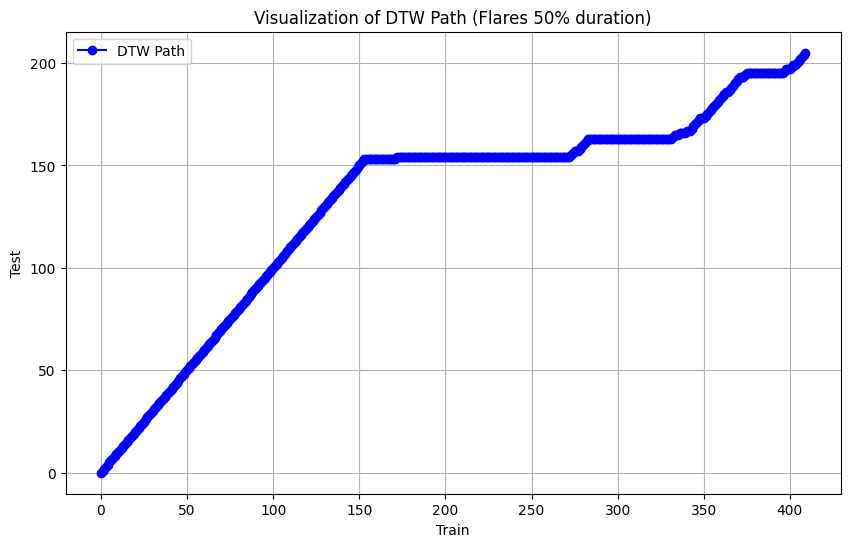

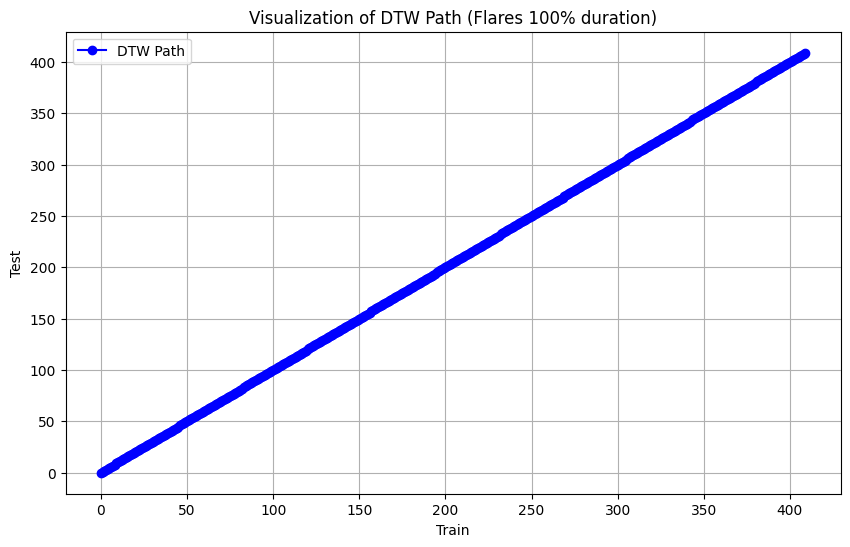

In [4]:
vis_path(path_50, "Flares 50% duration")
vis_path(path_100, "Flares 100% duration")
